#### Audio Classification Data Preprocessing

In [22]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='data\\wavfiles\\11713-4.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [23]:
print(librosa_audio_data)

[-0.11188605  0.1757991   0.20390101 ... -0.01141019 -0.00612246
  0.00884274]


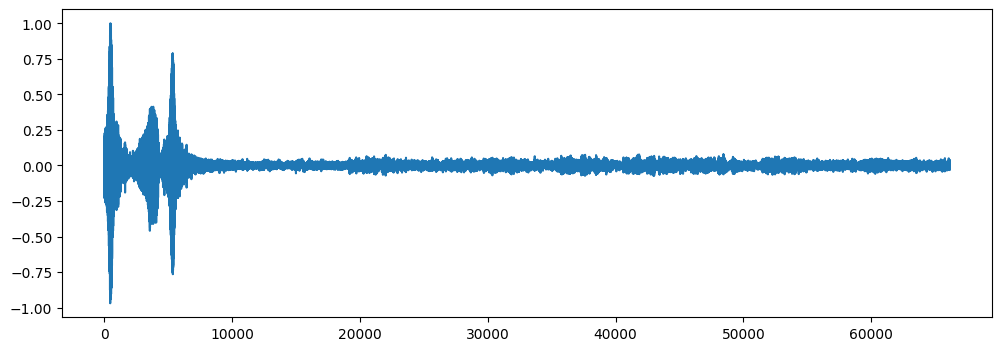

In [24]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [25]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [26]:
wave_audio

array([-0.11188605,  0.1757991 ,  0.20390101, ..., -0.01141019,
       -0.00612246,  0.00884274], dtype=float32)

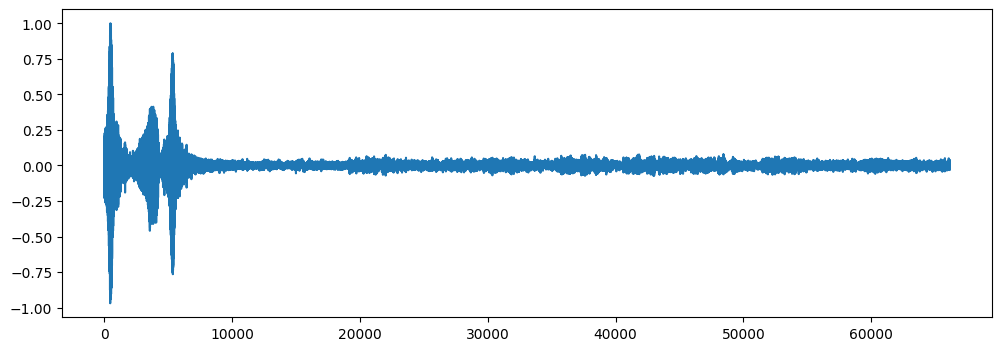

In [27]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [28]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 130)


In [29]:
mfccs

array([[-1.4738315e+02, -1.2166518e+02, -1.4961604e+02, ...,
        -2.4432187e+02, -2.4436469e+02, -2.6724918e+02],
       [-6.8961075e+01, -6.0362682e+01, -2.5712809e+01, ...,
         5.3480213e+01,  5.4560505e+01,  5.3180023e+01],
       [-6.3904190e+01, -7.7196915e+01, -8.6924866e+01, ...,
        -5.8051468e+01, -5.7292805e+01, -5.9100662e+01],
       ...,
       [-1.6415906e+00,  6.2192392e-01,  5.9821486e-01, ...,
         3.0339158e+00,  3.1825107e-01,  1.9581357e+00],
       [-9.8257363e-02,  2.8448238e+00,  2.6649427e+00, ...,
         5.4117031e+00,  8.7103481e+00,  8.0561609e+00],
       [ 1.7661002e+00,  6.3879919e+00,  5.4351759e+00, ...,
         9.1869059e+00,  3.4494181e+00, -1.1380522e+00]], dtype=float32)

In [36]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='data/wavfiles'
metadata=pd.read_csv('data/bird_songs_metadata.csv')
metadata.head()

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [40]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features


In [43]:
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(audio_dataset_path, str(row["filename"]))
    final_class_labels = row["name"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

5422it [01:45, 51.18it/s]


In [44]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','name'])
extracted_features_df.head()

,feature,name
0,"[-132.85225, 81.1399, 17.018223, 54.974297, -1...",Bewick's Wren
1,"[-147.74393, 99.42544, 20.885643, 44.118813, 1...",Bewick's Wren
2,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",Bewick's Wren
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",Bewick's Wren
4,"[-107.95914, 92.416, 17.773254, 43.13245, -1.8...",Bewick's Wren


In [46]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['name'].tolist())

In [47]:
X.shape

(5422, 40)

In [48]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [49]:
y.shape

(5422, 5)

In [50]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
X_train

array([[-271.31616   ,  -26.419062  ,  -63.76474   , ...,    2.5886762 ,
          -3.9820173 ,    5.081394  ],
       [-401.3699    ,  -31.111538  ,  -92.24523   , ...,   -2.9093552 ,
          -0.48502725,    1.7998825 ],
       [-366.7505    ,   -3.9161232 , -118.17853   , ...,   -2.0479555 ,
           1.2964001 ,    0.82310003],
       ...,
       [ -63.003605  ,   88.03719   ,  -30.778547  , ...,   -1.3984174 ,
          -1.852705  ,   -1.1443155 ],
       [-361.90756   ,   30.67692   ,  -64.73752   , ...,   -1.6385152 ,
          -0.9909662 ,   -0.40422416],
       [-168.7206    ,    1.3105386 ,  -65.46302   , ...,    2.2687547 ,
          -1.4256756 ,   -2.3499906 ]], dtype=float32)

In [52]:
y

array([[False,  True, False, False, False],
       [False,  True, False, False, False],
       [False,  True, False, False, False],
       ...,
       [False, False,  True, False, False],
       [False, False,  True, False, False],
       [False, False,  True, False, False]])

In [53]:
X_train.shape

(4337, 40)

In [54]:
X_test.shape

(1085, 40)

In [55]:
y_train.shape

(4337, 5)

In [56]:
y_test.shape

(1085, 5)

### Model Creation

In [57]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [59]:
### No of classes
num_labels=y.shape[1]

In [61]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [63]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [64]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
120/136 [=========================>....] - ETA: 0s - loss: 13.4135 - accuracy: 0.2203
Epoch 1: val_loss improved from inf to 1.60890, saving model to saved_models\audio_classification.hdf5
136/136 [==============================] - 2s 6ms/step - loss: 12.3208 - accuracy: 0.2220 - val_loss: 1.6089 - val_accuracy: 0.2424
Epoch 2/100
 27/136 [====>.........................] - ETA: 0s - loss: 3.2095 - accuracy: 0.2095

d:\Codebook\birds_voice\env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


134/136 [============================>.] - ETA: 0s - loss: 2.5510 - accuracy: 0.2132
Epoch 2: val_loss improved from 1.60890 to 1.60770, saving model to saved_models\audio_classification.hdf5
136/136 [==============================] - 1s 4ms/step - loss: 2.5408 - accuracy: 0.2131 - val_loss: 1.6077 - val_accuracy: 0.2249
Epoch 3/100
135/136 [============================>.] - ETA: 0s - loss: 1.8197 - accuracy: 0.2410
Epoch 3: val_loss improved from 1.60770 to 1.60685, saving model to saved_models\audio_classification.hdf5
136/136 [==============================] - 1s 4ms/step - loss: 1.8190 - accuracy: 0.2409 - val_loss: 1.6068 - val_accuracy: 0.2249
Epoch 4/100
120/136 [=========================>....] - ETA: 0s - loss: 1.6999 - accuracy: 0.2354
Epoch 4: val_loss improved from 1.60685 to 1.60636, saving model to saved_models\audio_classification.hdf5
136/136 [==============================] - 1s 4ms/step - loss: 1.6980 - accuracy: 0.2359 - val_loss: 1.6064 - val_accuracy: 0.2249
Epoch 5

In [65]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8285714387893677


In [69]:
prediction_feature.shape

(1, 40)

In [70]:
X_test[1]

array([-189.45573   ,   62.150654  ,   19.43638   ,   55.768246  ,
         22.014147  ,    1.1670711 ,   10.744263  ,   25.974308  ,
          4.4643216 ,    7.803728  ,    9.627176  ,   13.46692   ,
          0.9914598 ,    5.444376  ,    1.2118232 ,    5.9565663 ,
         -3.0814357 ,    2.580064  ,   -1.0993099 ,    3.641694  ,
         -4.4661713 ,    0.7465211 ,   -1.9080472 ,    1.6144162 ,
         -4.795732  ,    0.72689617,   -2.5761786 ,    3.1347122 ,
         -2.5605636 ,    1.7595351 ,   -1.1499922 ,    3.5236385 ,
         -2.869519  ,    3.5089357 ,   -0.5358303 ,    0.9323694 ,
         -1.6913215 ,    4.6088724 ,   -0.92421067,    1.7950323 ],
      dtype=float32)

In [68]:
filename="data\\wavfiles\\11713-10.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict(prediction_feature)

1/1 [==============================] - 0s 122ms/step


array([[0.05682084, 0.06921282, 0.5371144 , 0.23645277, 0.10039918]],
      dtype=float32)

# prediction new classes

In [12]:
import pandas as pd
import os
import librosa
import numpy as np
from tensorflow.keras.models import load_model

audio_dataset_path = 'data/wavfiles'
metadata = pd.read_csv('data/bird_songs_metadata.csv')
metadata.head()

def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

# Load the trained model
model = load_model('saved_models\\audio_classification.hdf5')  # Replace 'path_to_your_model.h5' with the actual path

# Function to predict the class of an audio file
def predict_audio_class(file_path):
    data = features_extractor(file_path)
    data = data.reshape(1, -1)  # Reshape data to match the model input shape
    predicted_class = np.argmax(model.predict(data))
    return predicted_class

# Example: Predict the class of an audio file
audio_file_path = r"dataset\sparrow\565240-7.wav"  # Replace with the path to your audio file
predicted_class_index = predict_audio_class(audio_file_path)
print("Predicted Class Index:", predicted_class_index)

# Get the corresponding class label from the metadata
# predicted_class_label = metadata.loc[predicted_class_index, 'name']
# print("Predicted Class Label:", predicted_class_label)

if predicted_class_index == 0:
    result = "American Robin"
elif predicted_class_index == 1:
    result = "Bewick's Wren"
elif predicted_class_index == 2:
    result = "Northern Cardinal"
elif predicted_class_index == 3:
    result = "Northern Mockingbird"
elif predicted_class_index == 4:
    result = "Sparrow"
print(result)

1/1 [==============================] - 0s 56ms/step
Predicted Class Index: 4
Sparrow
